# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 12 Task 1 - Natural Language Processing
### Assignment by: Kat Weissman

#### Objectives:

- Use pipelines and grid search
- Perform text mining

*Recommended learning resources:*
- https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
- https://www.nltk.org/

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from pdfminer.high_level import extract_text
import string

In [2]:
# nltk.download('punkt')
# nltk.download('stopwords')

### Level 1
### Exercise 2 
Take a text in English that you want, and calculate the frequency of the words

I am going to analyze the full product label of a brand name ibuprofen called Advil Migraine.

The product label was downloaded in .pdf format from the following website:
- https://www.advil.com/our-products/advil-migraine/
- https://www.advil.com/content/dam/cf-consumer-healthcare/bp-advil/en_US/pdf/LBL-00000037%20WEB%20READY%20ADVIL%20MIGRAINE%20(Version%2030).PDF

*References:*
- https://vitalflux.com/python-extract-text-pdf-file-using-pdfminer/
- https://pdfminersix.readthedocs.io/en/latest/
- https://machinelearningmastery.com/clean-text-machine-learning-python/

In [3]:
file_path = '/Users/kat/Library/Mobile Documents/com~apple~CloudDocs/IT Academy/Data Science Itinerary/Sprint 12 - Advanced Topics/'
file_name = 'LBL-00000037 WEB READY ADVIL MIGRAINE (Version 30).pdf'

Default parameters:

pdfminer.high_level.extract_text(pdf_file, password='', page_numbers=None, maxpages=0, caching=True, codec='utf-8', laparams=None)

In [4]:
text = extract_text(file_path+file_name, codec='utf-8')

In [5]:
print(text)

Advil Migraine
Solubilized Ibuprofen

This is the most current labeling information and may differ from labels on product packaging. If there are any 
differences between this website labeling and product packaging labeling, this website labeling should be regarded 
as the most current.

Purpose
Active ingredient (in each brown oval capsule)
Solubilized ibuprofen equal to 200 mg ibuprofen (NSAID)* ………..…………..Pain reliever
(present as the free acid and potassium salt)
*nonsteroidal anti-inflammatory drug

Allergy alert: Ibuprofen may cause a severe allergic reaction, especially in people allergic 
to aspirin. Symptoms may include:

Drug Facts

Use

 treats migraine

Warnings

 hives

 facial swelling

 asthma (wheezing)

 shock

 skin reddening  

 rash  

 blisters 

If an allergic reaction occurs, stop use and seek medical help right away.

Stomach bleeding warning: This product contains an NSAID, which may cause severe 
stomach bleeding.  The chance is higher if you

 are ag

In [6]:
tokenized_word = word_tokenize(text)
print(tokenized_word)

['Advil', 'Migraine', 'Solubilized', 'Ibuprofen', 'This', 'is', 'the', 'most', 'current', 'labeling', 'information', 'and', 'may', 'differ', 'from', 'labels', 'on', 'product', 'packaging', '.', 'If', 'there', 'are', 'any', 'differences', 'between', 'this', 'website', 'labeling', 'and', 'product', 'packaging', 'labeling', ',', 'this', 'website', 'labeling', 'should', 'be', 'regarded', 'as', 'the', 'most', 'current', '.', 'Purpose', 'Active', 'ingredient', '(', 'in', 'each', 'brown', 'oval', 'capsule', ')', 'Solubilized', 'ibuprofen', 'equal', 'to', '200', 'mg', 'ibuprofen', '(', 'NSAID', ')', '*', '………', '..', '…………', '..', 'Pain', 'reliever', '(', 'present', 'as', 'the', 'free', 'acid', 'and', 'potassium', 'salt', ')', '*', 'nonsteroidal', 'anti-inflammatory', 'drug', 'Allergy', 'alert', ':', 'Ibuprofen', 'may', 'cause', 'a', 'severe', 'allergic', 'reaction', ',', 'especially', 'in', 'people', 'allergic', 'to', 'aspirin', '.', 'Symptoms', 'may', 'include', ':', 'Drug', 'Facts', 'Use', 

In [7]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 363 samples and 954 outcomes>


The most common token is the formating code for the bullet point on the product label. There are other punctuation tokens that are not words, such as the comma, period, and parenthesis. Some cleaning of the token data needs to be done in order to do an analysis of words.

In [8]:
pd.DataFrame(fdist.most_common(30),columns=['token','frequency'])

,token,frequency
0,,50
1,",",35
2,or,27
3,.,21
4,a,19
5,you,19
6,have,17
7,of,17
8,the,14
9,and,13


/Users/kat/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 61550 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kat/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 61550 missing from current font.
  font.set_text(s, 0, flags=flags)


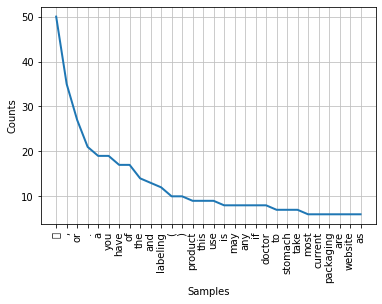

In [9]:
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

### Level 2
### Exercise 1
Remove stopwords and stem your dataset.

In [10]:
stop_words = set(stopwords.words("english"))

In [11]:
filtered_words = []
for w in tokenized_word:
    if w not in stop_words:
        filtered_words.append(w)

In [12]:
fdist_filter = FreqDist(filtered_words)
print(fdist_filter)

<FreqDist with 310 samples and 663 outcomes>


After stop words are removed, we can see that futher processing should be done to evaluate the words. Removing punctuation, and converting all words to lowercase would be helpful, becuase 'ibuprofen' and 'Ibuprofen' are counted separately.

In [13]:
pd.DataFrame(fdist_filter.most_common(30),columns=['token','frequency'])

,token,frequency
0,,50
1,",",35
2,.,21
3,labeling,12
4,(,10
5,),10
6,product,9
7,use,9
8,may,8
9,doctor,8


/Users/kat/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 61550 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kat/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 61550 missing from current font.
  font.set_text(s, 0, flags=flags)


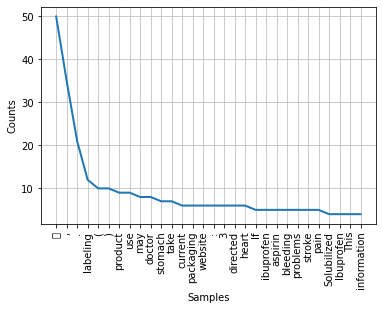

In [14]:
# Frequency Distribution Plot
fdist_filter.plot(30,cumulative=False)
plt.show()

In [15]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))


In [16]:
fdist_stemmed = FreqDist(stemmed_words)
print(fdist_stemmed)

<FreqDist with 276 samples and 663 outcomes>


Stemming the words took into consideration the capitalization because 'ibuprofen' is now counted correctly with 9 instances instead of 5 for 'ibuprofen' and 4 for 'Ibuprofen'. Punctuation still needs to be removed.

In [17]:
pd.DataFrame(fdist_stemmed.most_common(30),columns=['token','frequency'])

,token,frequency
0,,50
1,",",35
2,.,21
3,label,15
4,use,13
5,take,11
6,(,10
7,),10
8,ibuprofen,9
9,product,9


In [18]:
# remove punctuation
print(string.punctuation)

words = []
for w in stemmed_words:
    if w not in string.punctuation:
        words.append(w)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
fdist_words = FreqDist(words)
print(fdist_words)

<FreqDist with 266 samples and 573 outcomes>


In [20]:
dfWords = pd.DataFrame(fdist_words.most_common(),columns=['token','frequency'])

The coding for the bullet point is not automatically removed with any of the functions used previously, so it must be deleted manually.

In [21]:
dfWords.head()

,token,frequency
0,,50
1,label,15
2,use,13
3,take,11
4,ibuprofen,9


/Users/kat/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 61550 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kat/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 61550 missing from current font.
  font.set_text(s, 0, flags=flags)


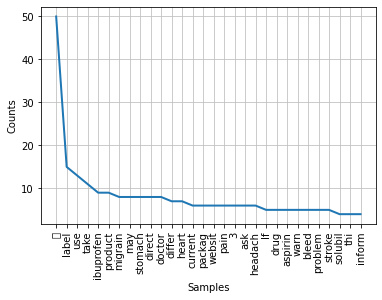

In [22]:
# Frequency Distribution Plot
fdist_words.plot(30,cumulative=False)
plt.show()

In [23]:
# Drop first row
dfWords.drop(index=dfWords.index[0], axis=0, inplace=True)

##### 10 Most Common Words in the Label:

In [24]:
dfWords.head(10)

,token,frequency
1,label,15
2,use,13
3,take,11
4,ibuprofen,9
5,product,9
6,migrain,8
7,may,8
8,stomach,8
9,direct,8
10,doctor,8


### Level 3
### Exercise 1
Perform sentiment analysis on your dataset.

I did not have time to perform the Level 3 task.